### Open Food Facts ###

#### Some references or links which are giving some useful information about Openn Food Facts
https://world.openfoodfacts.org/

https://www.kaggle.com/openfoodfacts/world-food-facts/home

https://fr.wikipedia.org/wiki/Open_Food_Facts

https://github.com/wgong/open_source_learning/blob/master/projects/Open_Food/open-food-5k.ipynb

https://www.kaggle.com/sarapissou/open-food-facts#


https://world.openfoodfacts.org/contributors


## Some articles about how sugar is bad ##
https://sydney.edu.au/news-opinion/news/2018/03/12/-yes--too-much-sugar-is-bad-for-our-health-.html

https://www.urmc.rochester.edu/patients-families/health-matters/november-2014/no-sugar-coating-sugar-just-isn%E2%80%99t-helping-your-hea.aspx

https://www.webmd.com/diabetes/features/how-sugar-affects-your-body

<img style="width:150px;height:150px;" src="https://wallpaperbrowse.com/media/images/sugar-health-3.gif"/>





In [62]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import matplotlib.ticker as mtick
from datetime import datetime, date, time


# Import libraries
import requests
from bs4 import BeautifulSoup

<div class="alert alert-block alert-success">

<b>EXTRA STEPS</b><br>
<i>Load data from CSV Files. Please notice that files have been split by contributors below</i>
</i>
</div>

### Get a copy of the file from ###

http://openfoodfacts.funspirit.ch/en.openfoodfacts.org.products.csv

In [65]:
##### Read file and split by main contributors/Creators
df_food = pd.read_csv('./en.openfoodfacts.org.products.csv', sep="\t", low_memory=False)  

<div class="alert alert-block alert-success">

<b>EXTRA STEPS</b><br>
<i>Split/Save data per contributors/CSV files</i>
</i>
</div>

In [72]:
df_food_kiliweb = df_food.query("creator == 'kiliweb'")
df_food_kiliweb.to_csv('en.openfoodfacts.org.products.kiliweb.299820.csv', sep='\t')

In [73]:
df_food_usda_ndb_import = df_food.query("creator == 'usda-ndb-import'")
df_food_usda_ndb_import.to_csv('en.openfoodfacts.org.products.usda-ndb-import.169861.csv', sep='\t')

In [74]:
df_food_openfood_ch = df_food.query("creator == 'openfood-ch-import'")
df_food_openfood_ch.to_csv('en.openfoodfacts.org.products.openfood-ch-import.11459.csv', sep='\t')

In [75]:
df_food_others = df_food.query("creator.isin(['kiliweb', 'usda-ndb-import', 'openfood-ch-import']) == False")
df_food_others.to_csv('en.openfoodfacts.org.products.others.200428.csv', sep='\t')

<div class="alert alert-block alert-success">

<b>EXTRA STEPS</b><br>
<i>Reload splitted files and concat them in order to have one file again.
    
It is therefore possible to analyze them separately if required.
</i>
</div>

### Get a copy of the files from ###

http://openfoodfacts.funspirit.ch/en.openfoodfacts.org.products.kiliweb.299820.csv

http://openfoodfacts.funspirit.ch/en.openfoodfacts.org.products.usda-ndb-import.169861.csv

http://openfoodfacts.funspirit.ch/en.openfoodfacts.org.products.openfood-ch-import.11459.csv

http://openfoodfacts.funspirit.ch/en.openfoodfacts.org.products.others.200428.csv

In [76]:
df_food_kili_web_r = pd.read_csv('./en.openfoodfacts.org.products.kiliweb.299820.csv', sep="\t", low_memory=False)  
df_food_usda_ndb_import_r = pd.read_csv('./en.openfoodfacts.org.products.usda-ndb-import.169861.csv', sep="\t", low_memory=False)  
df_food_openfood_ch_r = pd.read_csv('./en.openfoodfacts.org.products.openfood-ch-import.11459.csv', sep="\t", low_memory=False)  
df_food_others_r = pd.read_csv('./en.openfoodfacts.org.products.others.200428.csv', sep="\t", low_memory=False)  

frames = [df_food_kili_web_r, df_food_usda_ndb_import_r, df_food_openfood_ch_r, df_food_others_r]
df_food_r = pd.concat(frames)

In [77]:
print('\ndf_food:' + str(df_food.shape))
print('\ndf_food_r:' + str(df_food_r.shape))

print('\ndf_food:' + str(df_food.count()))
print('\ndf_food_r:' + str(df_food_r.count()))

print('\ndf_foold:' + str(df_food.columns))
print('\ndf_foold_r:' + str(df_food_r.columns))



df_food:(681602, 173)

df_food_r:(681602, 174)

df_food:code                                    681568
url                                     681568
creator                                 681599
created_t                               681598
created_datetime                        681592
last_modified_t                         681602
last_modified_datetime                  681602
product_name                            654761
generic_name                            75765 
quantity                                189965
packaging                               137285
packaging_tags                          137282
brands                                  460425
brands_tags                             460392
categories                              173826
categories_tags                         173825
categories_en                           173791
origins                                 40790 
origins_tags                            40737 
manufacturing_places                    65402 
man

In [104]:
df_food = df_food_r

#### Those could be interesting values to analyze as they are almost present
print('- df_food.product_name: ' + str(df_food.product_name.count()))
print('- df_food.sugars_100g: ' + str(df_food.sugars_100g.count()))
print('- df_food.salt_100g: ' + str(df_food.salt_100g.count()))
print('- df_food.fat_100g: ' + str(df_food.fat_100g.count()))


print('\ndf_food_usda_ndb_import_r:\n' + str(df_food_usda_ndb_import_r[['creator', 'product_name','brands', 'sugars_100g','salt_100g','fat_100g']].count()))
print('\ndf_food_openfood_ch:\n' + str(df_food_openfood_ch_r[['creator', 'product_name','brands', 'sugars_100g','salt_100g','fat_100g']].count()))

- df_food.product_name: 654761
- df_food.sugars_100g: 566460
- df_food.salt_100g: 561184
- df_food.fat_100g: 576941

df_food_usda_ndb_import_r:
creator         169861
product_name    169814
brands          169008
sugars_100g     158582
salt_100g       169090
fat_100g        169465
dtype: int64

df_food_openfood_ch:
creator         11459
product_name    9226 
brands          6493 
sugars_100g     8563 
salt_100g       8271 
fat_100g        9185 
dtype: int64


<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA</b><br>
<i>The goal of this part is to understand the data and check if it seems to be completed and trustworthy.
</i>
<hr>
<br><b>Who are the Contributors</b><br>
We would like to check who are the contributors, who is contributing the more, could we trust the source and could we found some references in the net.

<br><b>What are the Brands</b><br>
We would like to check if all products are assigned to a Brand and check if all those Brand exists (cross check with wikipedia per example)

<br><b>What are the Countries or Origins</b><br>
We would like to check if all products are assigned to a Countries and to an Origins (Countries).
As we suspect duplicate and non-normalized data, those values should most probably be cleaned.

<br><b>Check if there are some more anomalies in data</b><br>
So far it seems that some Products have been entered many times.

<hr>
<b>Please notice that the file has been dowloaded from Internet and we should check if the file in the Cluster is identical</b>

</div>



<p style="color:#3C763D"><i>
    Generic Functions required to perform our Analysis 
</i></p>

In [91]:
##### Calculate the number of rows of a specific DF
def get_rows(df):
    rows = df.shape[0]
    return rows


##### Return the 10 rows with percentage of a specific DF
def get_top_10(df, column_name):
    rows = get_rows(df)
    
    counts = df[column_name].value_counts()
    counts = counts.to_frame(name='counts')
    
    counts['percentage'] = counts['counts']/rows*100

    return counts.head(10).copy()


##### Counte the number of empty rows for a specific Data Frame
def get_empty_rows(df, column_name):
    return df.query(str(column_name) + '.isnull()').count()


##### Show Result in a Plot, to check the distribution of the data    
def show_plot(df):
    df[['counts']].sort_values(by=['counts']).plot(kind='barh', stacked=True, figsize=(10,10))
    plt.show() 
    
    
##### Print main statistics items    
def print_stats(df, column_name):
    total_rows = get_rows(df)
    empty_rows = str(df[column_name].isna().sum())
    perc = int(empty_rows) * 100 / int(total_rows)
    print ('Number of empty records for ' + str(column_name) + ': ' + str(empty_rows) + ' (' + str(perc) + '%)' )
    print (df[column_name].agg(['nunique','count','size']))
        

<p style="color:#3C763D"><i>
    <b>UNDERSTANDING THE DATA</b>: Overview 
</i></p>

In [89]:
print('Open Food Data contains ' + str(get_rows(df_food)) + ' products.' + str(df_food.shape) )



Open Food Data contains 681602 products.(681602, 174)


<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Contributors</b><br>
<i>We are looking who are the contributors and what are their contributions by Products (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Who are those contributors ? except usda-ndb-import and openfood-ch-import, could we trust them ?

Almost 44% of the products have been created by kiliweb. Who is kiliweb ?

Furthermore, there are records (3) without contributor (creator)
</i>
<br>
</div>



Top 10 Contributors (Counts & Percentage)
                            counts  percentage
kiliweb                     299820  43.987547 
usda-ndb-import             169861  24.920848 
openfoodfacts-contributors  82719   12.135968 
date-limite-app             17453   2.560585  
openfood-ch-import          11459   1.681186  
tacite                      8438    1.237966  
sebleouf                    8359    1.226376  
tacinte                     5282    0.774939  
stephane                    2774    0.406982  
javichu                     2766    0.405809  


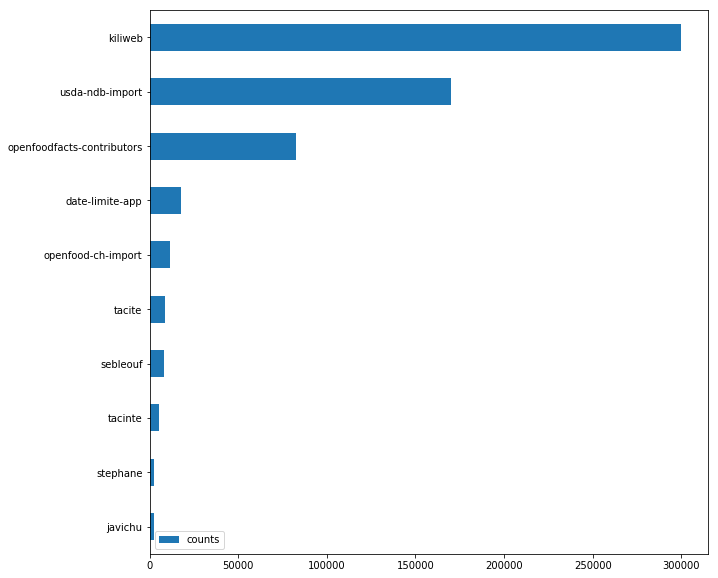

Number of empty records for creator: 3 (0.0004401395535811221%)
nunique    6544  
count      681599
size       681602
Name: creator, dtype: int64


In [92]:
##### Get top 10 Contributors
df_10_contributors = get_top_10(df_food, 'creator')

##### Show Result
print('\nTop 10 Contributors (Counts & Percentage)')
print(df_10_contributors)    
show_plot(df_10_contributors)

##### Show Information about empty records
print_stats(df_food, 'creator')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Brands</b><br>
<i>We are looking what are the Brands (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Almost 32% of the products are not assigned to any 'Brand', why ?
</i>
<br>
</div>



Top 10 Brands (Counts & Percentage)
              counts  percentage
Carrefour     5384    0.789904  
Auchan        5313    0.779487  
U             4401    0.645685  
Casino        3130    0.459212  
Leader Price  2825    0.414465  
Cora          2230    0.327170  
Meijer        1997    0.292986  
Kroger        1673    0.245451  
Picard        1517    0.222564  
Ahold         1370    0.200997  


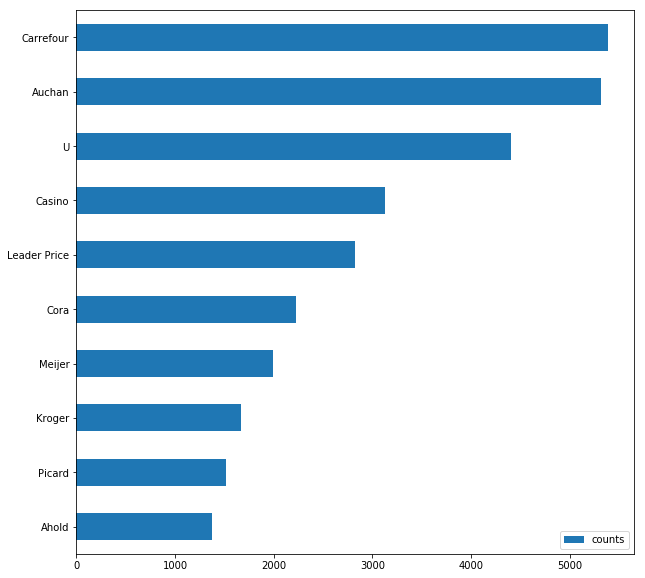

Number of empty records for brands: 221177 (32.449582014137285%)
nunique    98663 
count      460425
size       681602
Name: brands, dtype: int64


In [93]:
##### Get top 10 Brands
df_10_brands = get_top_10(df_food, 'brands')

##### Show Result
print('\nTop 10 Brands (Counts & Percentage)')
print(df_10_brands)    
show_plot(df_10_brands)

##### Show Information about empty records
print_stats(df_food, 'brands')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Countries</b><br>
<i>We are looking what are the countries_en (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Almost 60% of the Product seems assigned to France, which is very suspicious and requires further investigations.
    
Some products seem to be linked to multiple countries like (Belgium, France)

Few records (5444) are not linked to any country.
</i>
<br>
</div>


Top 10 countries_en (Counts & Percentage)
                    counts  percentage
France              409951  60.145217 
United States       173494  25.453857 
Switzerland         13543   1.986937  
Germany             11629   1.706128  
Spain               6104    0.895537  
France,Germany      5884    0.863260  
United Kingdom      5643    0.827903  
Belgium             5309    0.778900  
France,Switzerland  4345    0.637469  
Belgium,France      3505    0.514230  


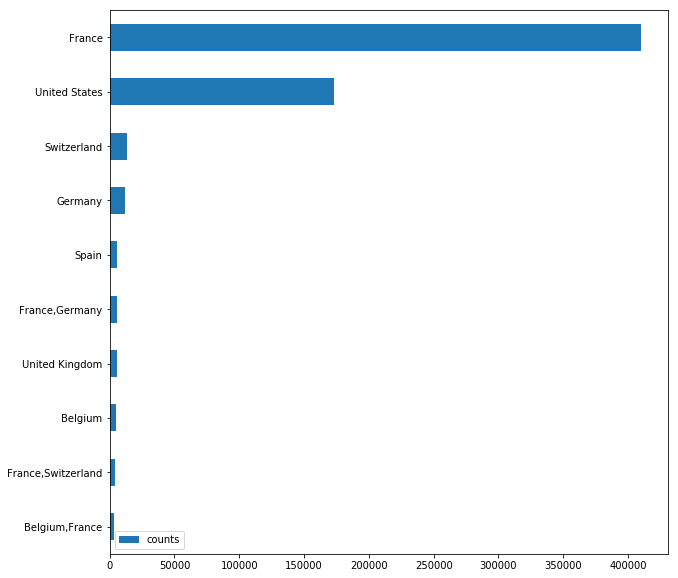

Number of empty records for countries_en: 544 (0.07981197238271015%)
nunique    1361  
count      681058
size       681602
Name: countries_en, dtype: int64


In [94]:
##### Get top 10 Countries_en
df_10_countries_en = get_top_10(df_food, 'countries_en')

##### Show Result
print('\nTop 10 countries_en (Counts & Percentage)')
print(df_10_countries_en)    
show_plot(df_10_countries_en)

##### Show Information about empty records
print_stats(df_food, 'countries_en')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Origins</b><br>
<i>We are looking what are the origins (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Most of the products (94%) do not have any origin.
    
There is misspelling like 'Union Européenne' and 'Union européenne'

</i>
<br>
</div>


Top 10 origins (Counts & Percentage)
                  counts  percentage
France            10849   1.591691  
Union Européenne  1507    0.221097  
Italie            927     0.136003  
Espagne           856     0.125586  
España            667     0.097858  
México            636     0.093310  
Union européenne  469     0.068808  
Australia         462     0.067781  
Suisse            372     0.054577  
Deutschland       349     0.051203  


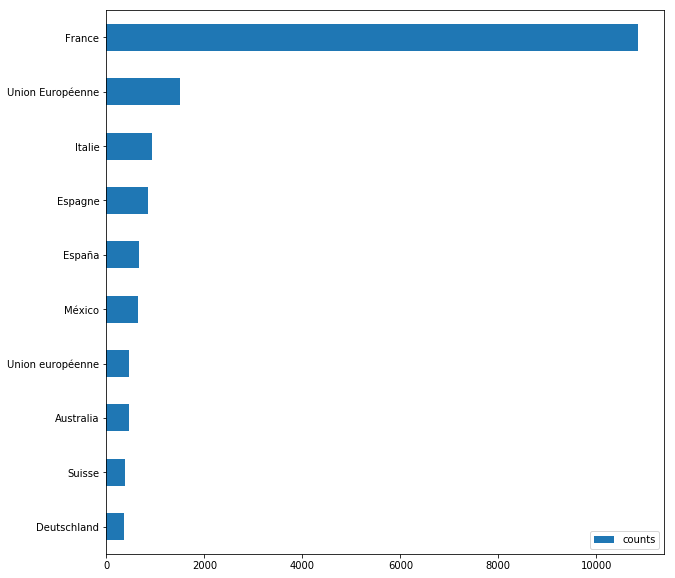

Number of empty records for origins: 640812 (94.01556920314201%)
nunique    7407  
count      40790 
size       681602
Name: origins, dtype: int64


In [95]:
##### Get top 10 Origins
df_10_origins = get_top_10(df_food, 'origins')

##### Show Result
print('\nTop 10 origins (Counts & Percentage)')
print(df_10_origins)    
show_plot(df_10_origins)

##### Show Information about empty records
print_stats(df_food, 'origins')

<div class="alert alert-block alert-success">

<b>UNDERSTANDING THE DATA - Main Category</b><br>
<i>We are looking what are the Main Category (count/percentage/emtpy)</i>
<hr>
<b>Remarks</b><br>
<i>
Most of the products (74%) do not have any Main Category.
    
To check if category changes by country, brands,...

</i>
<br>
</div>


Top 10 main_category_en (Counts & Percentage)
                                 counts  percentage
Plant-based foods and beverages  37312   5.474162  
Beverages                        25368   3.721820  
Sugary snacks                    23588   3.460671  
Dairies                          15580   2.285791  
Meats                            9589    1.406833  
Groceries                        9390    1.377637  
Meals                            7669    1.125143  
Spreads                          4355    0.638936  
Frozen foods                     3093    0.453784  
Fruit juices                     3065    0.449676  


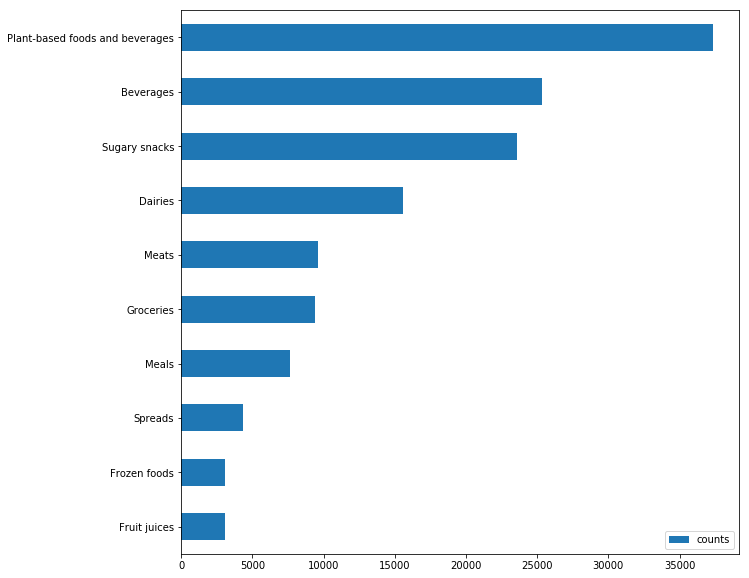

Number of empty records for main_category_en: 507880 (74.51269215759343%)
nunique    6589  
count      173722
size       681602
Name: main_category_en, dtype: int64


In [96]:
##### Get top 10 Main Category en
df_10_main_category_en = get_top_10(df_food, 'main_category_en')

##### Show Result
print('\nTop 10 main_category_en (Counts & Percentage)')
print(df_10_main_category_en)    
show_plot(df_10_main_category_en)

##### Show Information about empty records
print_stats(df_food, 'main_category_en')

<div class="alert alert-block alert-warning">

<b>UNDERSTANDING THE DATA - Extra Checks</b><br>
<i>We are looking about the Data Quality to understand what could be used for further analysis</i>
<hr>
<b>Remarks</b><br>
<i>
#Arrh, some product seems to be duplicated...  <br>
#Think about to check first-last Product per Contributors !<br>
#Think about to check per Country !<br>


</i>
<br>
</div>

In [97]:
print('\n\nTop 10 Countries_ens (Counts & Percentage)\n\n' + str(get_top_10(df_food, 'countries_en')))




Top 10 Countries_ens (Counts & Percentage)

                    counts  percentage
France              409951  60.145217 
United States       173494  25.453857 
Switzerland         13543   1.986937  
Germany             11629   1.706128  
Spain               6104    0.895537  
France,Germany      5884    0.863260  
United Kingdom      5643    0.827903  
Belgium             5309    0.778900  
France,Switzerland  4345    0.637469  
Belgium,France      3505    0.514230  


In [98]:
##### Duplicate Products with different product_name, see an example below !
df_food.query('code == 84253269827 ')

    

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
97160,112013,84253269827,http://world-en.openfoodfacts.org/product/0084253269827/dream-coffee-almond-drink-latte-mocha-the-hain-celestial-group-inc,usda-ndb-import,1489143569,2017-03-10T10:59:29Z,1489143570,2017-03-10T10:59:30Z,"Dream, Coffee+Almond Drink, Latte Mocha",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169072,644435,84253269827,http://world-en.openfoodfacts.org/product/84253269827/coffee-almond-drink-the-hain-celestial-group-inc,usda-ndb-import,1489142713,2017-03-10T10:45:13Z,1489142713,2017-03-10T10:45:13Z,Coffee+Almond Drink,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-block alert-warning">

<b>UNDERSTANDING THE DATA - Extra Queries</b><br>
<i>extra...</i>
<hr>
<b>Remarks</b><br>
<i>
</i>
<br>
</div>

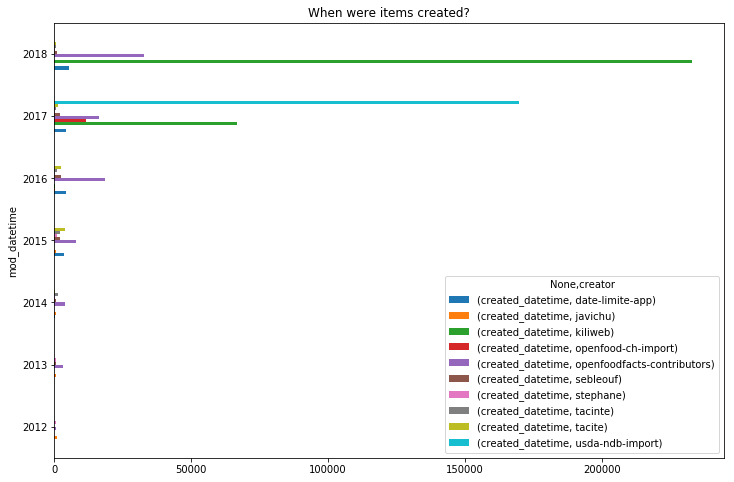

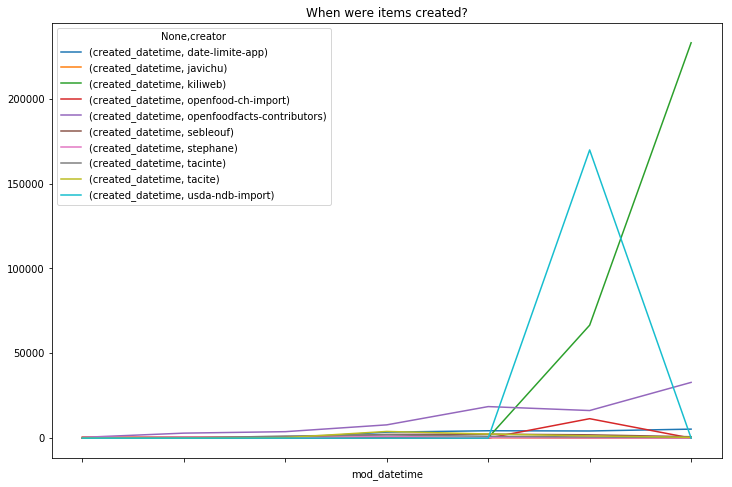

In [101]:
df=df_food


 

top_creators = df.loc[(df['creator']=='usda-ndb-import') | (df['creator']=='openfoodfacts-contributors') | (df['creator']=='kiliweb') | (df['creator']=='date-limite-app') | 
                  (df['creator']=='openfood-ch-import') | (df['creator']=='tacite') | (df['creator']=='sebleouf') | (df['creator']=='tacinte') | 
                  (df['creator']=='javichu') | (df['creator']=='stephane')][['creator','created_datetime']]

top_creators['mod_datetime'] = top_creators['created_datetime'].apply(lambda x: x[0:4])
top_creators.drop('created_datetime', axis=1)

mod_pivot = pd.pivot_table(top_creators, 
                           index=top_creators['mod_datetime'], 
                           columns='creator', 
                           aggfunc=len, fill_value=0)
mod_pivot.plot(kind="barh", figsize=(12,8), title="When were items created?")


mod_pivot.plot(kind="line", figsize=(12,8), title="When were items created?")

In [99]:
from IPython.core.display import HTML
pd.set_option('display.max_colwidth', -1)
df_food_overview = df_food.query("ingredients_from_palm_oil_n > 0")[['product_name', 'url', 'brands', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr']]
df_food_overview

,product_name,url,brands,ingredients_from_palm_oil_n,nutrition_grade_fr
112,Pâte à Sucre,http://world-en.openfoodfacts.org/product/0000010206515/pate-a-sucre-alice-delice,Alice Délice,1.0,d
179,Galette de Pommes de Terre,http://world-en.openfoodfacts.org/product/0000069006562/galette-de-pommes-de-terre-bofrost,Bofrost,1.0,b
398,4 Indulgent & Chewy Maple Syrup & Pecan Giant Cookies,http://world-en.openfoodfacts.org/product/00023092/4-indulgent-chewy-maple-syrup-pecan-giant-cookies-marks-spencer,Marks & Spencer,1.0,d
409,Made Without Wheat Blueberry Muffins,http://world-en.openfoodfacts.org/product/00027083/made-without-wheat-blueberry-muffins-marks-spencer,Marks & Spencer,1.0,d
410,Chocolate Fudge Cake,http://world-en.openfoodfacts.org/product/00027137/chocolate-fudge-cake-marks-spencer,Marks & Spencer,1.0,e
431,Chinois Nature Décongelé,http://world-en.openfoodfacts.org/product/0003004032145/chinois-nature-decongele-intermarche,Intermarché,1.0,e
448,6 Breaded Jumbo Tiger Prawns,http://world-en.openfoodfacts.org/product/00035460/6-breaded-jumbo-tiger-prawns-marks-spencer,Marks & Spencer,1.0,c
462,Lattice Topped Mince Pies,http://world-en.openfoodfacts.org/product/00045889/lattice-topped-mince-pies-marks-spencer,Marks & Spencer,1.0,e
481,Arachides enrobées chocolat au lait,http://world-en.openfoodfacts.org/product/00052283/arachides-enrobees-chocolat-au-lait-m-s,M&S,1.0,NaN
572,Lemon meringue fudge,http://world-en.openfoodfacts.org/product/00087728/lemon-meringue-fudge-m-s,M&S,1.0,NaN


In [48]:
pd.set_option('display.max_colwidth', -1)
df_food.query("ingredients_from_palm_oil_n > 0 ")[['product_name', 'url','image_url']].head(100)

,product_name,url,image_url
254,Salade Cesar,http://world-en.openfoodfacts.org/product/0000000290616/salade-cesar-kirkland-signature,NaN
322,Pâte à Sucre,http://world-en.openfoodfacts.org/product/0000010206515/pate-a-sucre-alice-delice,NaN
446,Galette de Pommes de Terre,http://world-en.openfoodfacts.org/product/0000069006562/galette-de-pommes-de-terre-bofrost,NaN
996,4 Indulgent & Chewy Maple Syrup & Pecan Giant Cookies,http://world-en.openfoodfacts.org/product/00023092/4-indulgent-chewy-maple-syrup-pecan-giant-cookies-marks-spencer,NaN
1032,Made Without Wheat Blueberry Muffins,http://world-en.openfoodfacts.org/product/00027083/made-without-wheat-blueberry-muffins-marks-spencer,NaN
1033,Chocolate Fudge Cake,http://world-en.openfoodfacts.org/product/00027137/chocolate-fudge-cake-marks-spencer,NaN
1071,Chinois Nature Décongelé,http://world-en.openfoodfacts.org/product/0003004032145/chinois-nature-decongele-intermarche,NaN
1117,6 Breaded Jumbo Tiger Prawns,http://world-en.openfoodfacts.org/product/00035460/6-breaded-jumbo-tiger-prawns-marks-spencer,NaN
1158,Lattice Topped Mince Pies,http://world-en.openfoodfacts.org/product/00045889/lattice-topped-mince-pies-marks-spencer,NaN
1211,Arachides enrobées chocolat au lait,http://world-en.openfoodfacts.org/product/00052283/arachides-enrobees-chocolat-au-lait-m-s,NaN


In [100]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_food_companies')
#r = requests.get('https://en.wikipedia.org/wiki/List_of_brand_name_food_products')

page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')
all_li = soup.find_all('li')

linkTexts = []
linkUrls =[]

for li in all_li:
    
    a = li.find('a')
    if (    a is not None \
        and a.has_attr('href') \
        and a.has_attr('title') \
        and len(a.text)>0 ):
        if(a.text[0].isdigit() == False and a.text.startswith('href') == False):
            #print(str(a.text) + '-https://en.wikipedia.org' + str(a['href']))        
            
            linkTexts.append(a.text)
            linkUrls.append('https://en.wikipedia.org' + str(a['href']))
            
            #Exit after last Food Companies
            if(a.text.startswith('Vinamilk')):
                break
            
        
df = pd.DataFrame(list(zip(linkTexts, linkUrls)), \
                  columns=['company_name','company_url'])
#df.index = df['company_name']
df.sort_values(by='company_name')

,company_name,company_url
1058,A-Treat Bottling Company,https://en.wikipedia.org/wiki/A-Treat_Bottling_Company
784,A. E. Rodda & Son,https://en.wikipedia.org/wiki/A._E._Rodda_%26_Son
866,A. L. Simpkin & Co. Ltd,https://en.wikipedia.org/wiki/A._L._Simpkin_%26_Co._Ltd
1136,"A. Zerega's Sons, Inc.","https://en.wikipedia.org/wiki/A._Zerega%27s_Sons,_Inc."
785,A.G. Barr,https://en.wikipedia.org/wiki/A.G._Barr
646,ABR Holdings,https://en.wikipedia.org/wiki/ABR_Holdings
504,AVEBE,https://en.wikipedia.org/wiki/AVEBE
647,Aalst Chocolate,https://en.wikipedia.org/wiki/Aalst_Chocolate
701,AarhusKarlshamn,https://en.wikipedia.org/wiki/AarhusKarlshamn
293,Aavin,https://en.wikipedia.org/wiki/Aavin


In [50]:
df_food.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000000000291/mendiants,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000000000949/salade-de-carottes-rapees,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
